# Accident Detection Using Video

In [63]:
#Importing necessary Dependencies

In [22]:
import tensorflow as tf
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [39]:
from tensorflow.keras.models import load_model
model_path = "/kaggle/input/accident-model-h5/Accident_model.h5"
model = load_model(model_path)

In [64]:
#Model Hyperparams

In [40]:
batch_size = 100
img_height = 250
img_width = 250

In [65]:
#Prediction

In [41]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [42]:
image=[]
label=[]

c=1
cap= cv2.VideoCapture('/kaggle/input/cctvfootagevideo/videoplayback (online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 1s 763ms/step
60
1/1 [==============================] - 0s 33ms/step
90
1/1 [==============================] - 0s 38ms/step
120
1/1 [==============================] - 0s 42ms/step
150
1/1 [==============================] - 0s 39ms/step
180
1/1 [==============================] - 0s 31ms/step
210
1/1 [==============================] - 0s 32ms/step
240
1/1 [==============================] - 0s 34ms/step
270
1/1 [==============================] - 0s 30ms/step
300
1/1 [==============================] - 0s 30ms/step
330
1/1 [==============================] - 0s 34ms/step
360
1/1 [==============================] - 0s 30ms/step
390
1/1 [==============================] - 0s 39ms/step
420
1/1 [==============================] - 0s 37ms/step
450
1/1 [==============================] - 0s 33ms/step
480
1/1 [==============================] - 0s 30ms/step
510
1/1 [==============================] - 0s 36ms/step
540
1/1 [==============================] - 0s 34ms

AxesImage(size=(360, 640))
No Accident


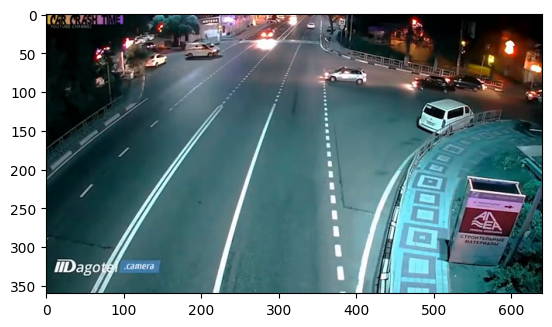

In [60]:
print(plt.imshow(image[10]))
print(label[11])
    